# Analiza danych z użyciem Seaborn – Titanic Dataset

Celem tej części praktycznej jest pokazanie możliwości biblioteki **Seaborn** w kontekście eksploracyjnej analizy danych (EDA). 
Pokażemy:
- Różne typy wykresów, 
- faceting,
- figure-level API, 
- estetykę,
- wbudowane mechanizmy statystyczne.

# Opis danych z tabeli Titanic

W tym przykładzie korzystamy z wbudowanego zbioru danych `titanic` z biblioteki `seaborn`. Zbiór danych zawiera informacje o pasażerach Titanica, takie jak:

| Kolumna       | Opis                                                                                   |
|---------------|----------------------------------------------------------------------------------------|
| `survived`    | Status przeżycia (0 = nie przeżył, 1 = przeżył)                                        |
| `pclass`      | Klasa biletu (1 = pierwsza, 2 = druga, 3 = trzecia)                                    |
| `sex`         | Płeć pasażera (`male` lub `female`)                                                    |
| `age`         | Wiek pasażera w latach                                                                 |
| `sibsp`       | Liczba rodzeństwa/małżonków na pokładzie                                               |
| `parch`       | Liczba rodziców/dzieci na pokładzie                                                   |
| `fare`        | Cena biletu pasażera                                                                   |
| `embarked`    | Kod portu zaokrętowania (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton)        |
| `class`       | Tekstowa reprezentacja klasy biletu (`First`, `Second`, `Third`)                        |
| `who`         | Ogólna kategoria osoby (`man`, `woman`, `child`)                                        |
| `adult_male`  | Czy pasażer był dorosłym mężczyzną (`True`/`False`)                                    |
| `deck`        | Pokład, na którym znajdował się pasażer (jeśli dostępny)                               |
| `embark_town` | Nazwa miasta portu zaokrętowania                                                       |
| `alive`       | Tekstowy status przeżycia (`yes`/`no`)                                                |
| `alone`       | Czy pasażer podróżował sam (`True`/`False`)                                            |



In [1]:
# ========================
# Import bibliotek
# ========================
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ustawienia globalne estetyki Seaborn
sns.set_theme(style="whitegrid", palette="muted", context="talk")

# ========================
# Wczytanie danych
# ========================
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Analiza braków danych oraz struktury wieku pasażerów Titanic

Poniższy zestaw wizualizacji przedstawia analizę jakości danych oraz rozkładu wieku pasażerów za pomocą biblioteki Seaborn. Celem jest identyfikacja braków, ocena ich struktury oraz lepsze zrozumienie jednej z kluczowych zmiennych — wieku.

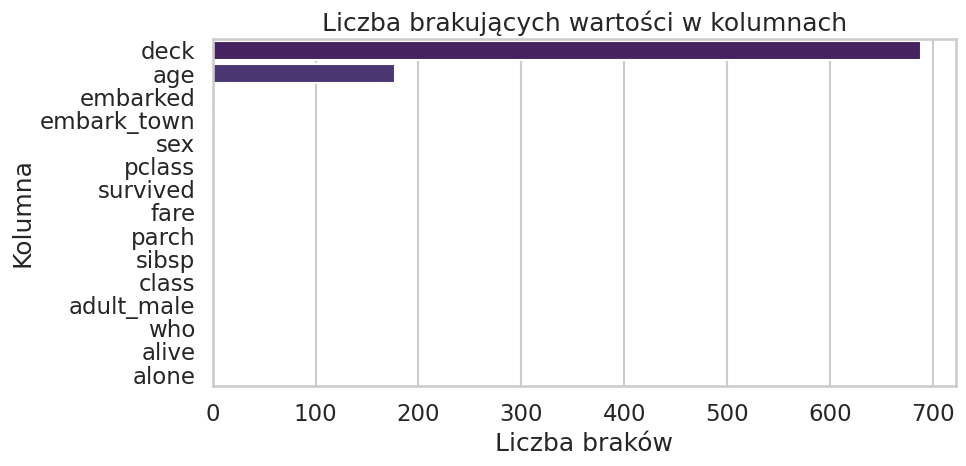

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# estetyka
sns.set_theme(style="whitegrid", context="talk")

# --- 1. Analiza braków danych ---
missing = df.isnull().sum().sort_values(ascending=False) # Obliczenie liczby braków w każdej kolumnie i posortowanie malejąco

# Utworzenie wykresu słupkowego prezentującego liczbę braków
plt.figure(figsize=(10, 5))
sns.barplot(x=missing.values, y=missing.index, hue=missing.index, palette="viridis",dodge=False, legend=False)

# Dodanie tytułu i opisów osi
plt.title("Liczba brakujących wartości w kolumnach")
plt.xlabel("Liczba braków")
plt.ylabel("Kolumna")

# Dopasowanie elementów wykresu
plt.tight_layout()
plt.show()


### 1.1 Analiza braków danych

Pierwszym krokiem była identyfikacja liczby brakujących wartości w poszczególnych kolumnach. Wykres słupkowy przedstawia liczbę braków posortowaną malejąco, co pozwala szybko określić, które zmienne wymagają największej uwagi podczas przygotowania danych.

- Kolumny o największej liczbie braków są łatwo zauważalne na osi Y.

- Paleta viridis zapewnia przejrzystą prezentację różnic między zmiennymi.

---

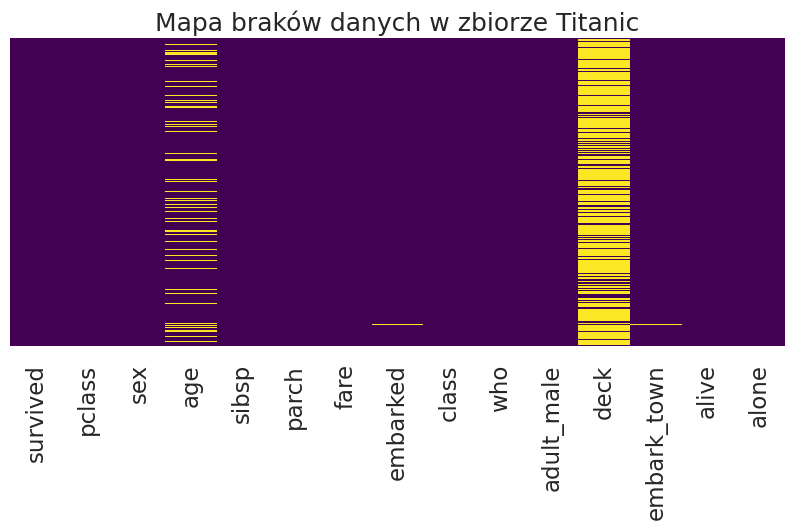

In [3]:
# --- 2. Mapa braków danych ---

# Utworzenie mapy cieplnej przedstawiającej lokalizację braków danych
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

# Tytuł wykresu
plt.title("Mapa braków danych w zbiorze Titanic")
plt.show()

### 1.2 Wizualizacja rozmieszczenia braków danych

Mapa braków danych (heatmap) pozwala ocenić, gdzie w zbiorze występują ubytki, oraz czy istnieją wzorce zależne od konkretnych kolumn lub obserwacji.

Na mapie:

- brakujące wartości oznaczone są wyróżniającym się kolorem,

- pełne informacje widoczne są jako jednolite pasma,

- możliwe jest wychwycenie ewentualnych zależności między brakami.

Taka diagnostyka jest kluczowa przy decyzjach dotyczących imputacji lub usuwania danych.

---

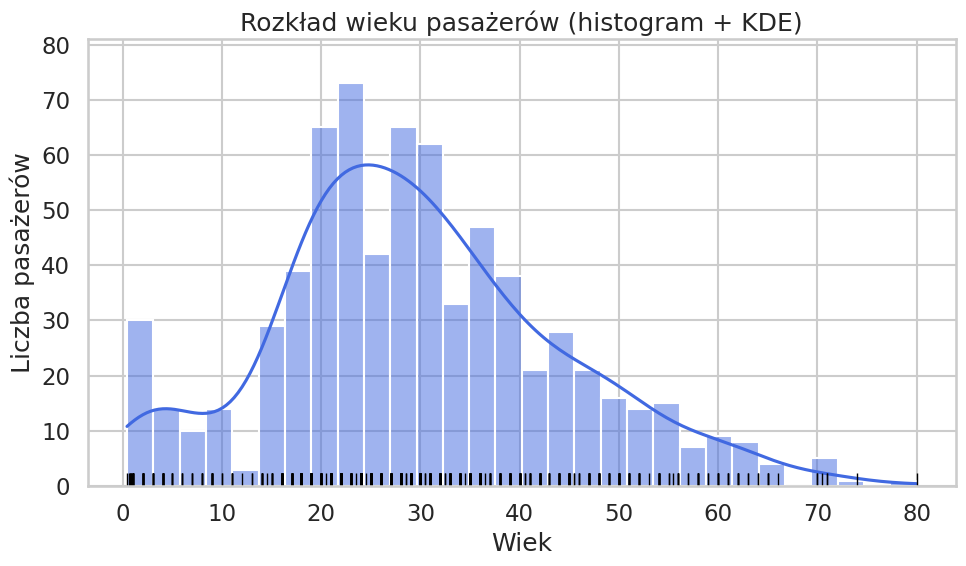

In [4]:
# --- 3. Dystrybucja wieku pasażerów ---

# Histogram wieku z estymacją gęstości i rugplotem
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True, color='royalblue')

# Rugplot pokazujący położenie indywidualnych obserwacji
sns.rugplot(data=df, x='age', height=0.03, color='black')

# Tytuły wykresu i osi
plt.title("Rozkład wieku pasażerów (histogram + KDE)")
plt.xlabel("Wiek")
plt.ylabel("Liczba pasażerów")
plt.tight_layout()
plt.show()

### 1.3 Rozkład wieku pasażerów

Wiek jest istotną zmienną w analizach danych z Titanica — mógł wpływać na szanse przeżycia.

Histogram uzupełniony o krzywą KDE oraz rugplot prezentuje:

- ogólny kształt rozkładu wieku,

- gęstość obserwacji i potencjalne podgrupy wiekowe,

- obecność odstających wartości,

- rzeczywiste położenie poszczególnych obserwacji.

To kompleksowa i intuicyjna wizualizacja zmiennej ciągłej.

---

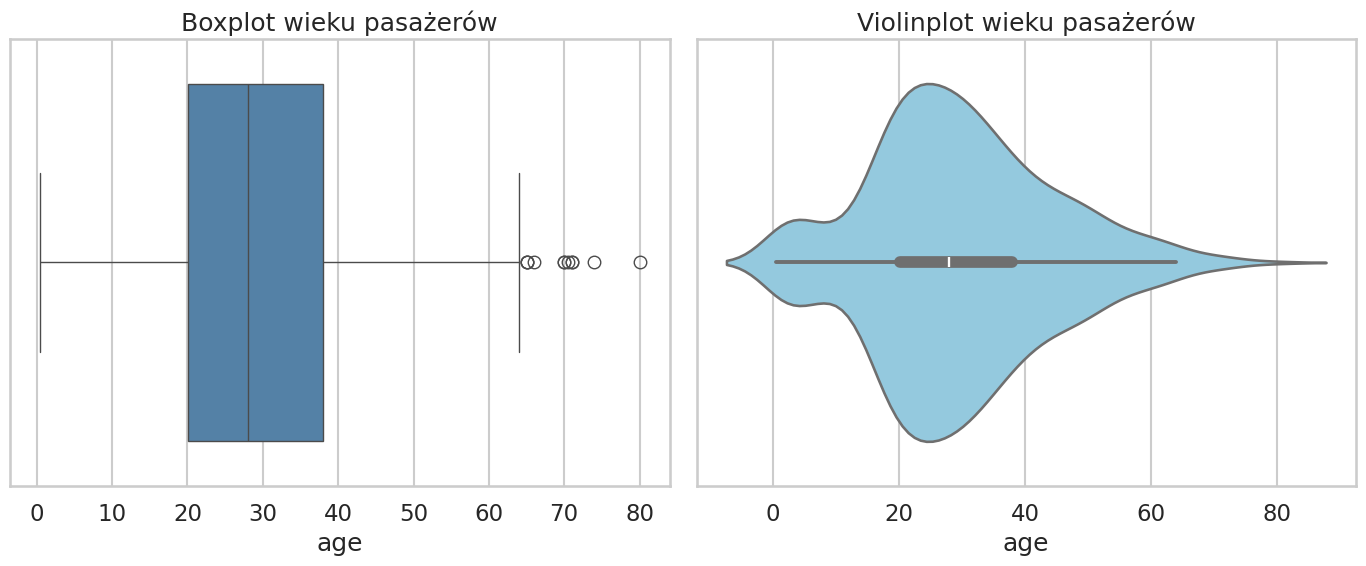

In [5]:
# --- 4. Dodatkowe profesjonalne wizualizacje wieku ---

# Utworzenie dwóch wykresów w jednym wierszu
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot prezentujący medianę i rozstępy
sns.boxplot(data=df, x='age', ax=axes[0], color='steelblue')
axes[0].set_title("Boxplot wieku pasażerów")

# Violinplot prezentujący gęstość rozkładu
sns.violinplot(data=df, x='age', ax=axes[1], color='skyblue')
axes[1].set_title("Violinplot wieku pasażerów")

plt.tight_layout()
plt.show()


### 1.4 Dodatkowe wizualizacje wieku (Boxplot i Violinplot)

Aby jeszcze lepiej zrozumieć strukturę zmiennej age, przedstawiono również wykres pudełkowy i wykres skrzypcowy.

**Boxplot**

- pokazuje medianę, kwartyle oraz wartości odstające,

- pozwala ocenić skośność lub symetrię danych.

**Violinplot**

- łączy cechy boxplota i estymacji gęstości (KDE),

- odsłania pełną strukturę rozkładu,

- dobrze ujawnia wielomodalność danych.

Połączenie tych wizualizacji daje pełny obraz zmienności wieku i jego rozkładu.

## Opis analityczny

### 1. Rozkład wieku jest asymetryczny (prawostronny)

Na obu wykresach widać, że:

- większość pasażerów jest w wieku ok. 20–40 lat,

- ogon wykresu ciągnie się w stronę wyższych wartości (aż do ok. 80 lat).

- To oznacza, że rozkład ma długi prawy ogon i nie jest symetryczny.

### 2. Mediana wieku to ok. 28–30 lat

Mediana (środkowa linia w boxplocie i biały pasek w violinplocie) jest wyraźnie bliżej dolnego zakresu danych niż górnego.

To oznacza, że połowa pasażerów ma mniej niż ok. 30 lat, a druga połowa więcej.

### 3. Duża koncentracja danych w środku rozkładu

Violinplot pokazuje, że gęstość danych:

- jest największa w przedziale 20–35 lat,
co wskazuje, że to najliczniejsza grupa pasażerów.

### 4. Obecność wartości odstających

Na boxplocie po prawej stronie widać outliery:

- kilka punktów w okolicach 60–80 lat.

To potwierdza, że większość obserwacji skupia się w niższych wartościach wieku, a starsze osoby są rzadkie.

### 5. Zakres wieku jest szeroki, ale rozkład mocno skupiony

- Minimalny wiek jest bliski 0.

- Maksymalny dochodzi do ok. 80 lat.

Mimo szerokiego zakresu, większość pasażerów mieści się w najszerszej części „skrzypcowego” wykresu — ok. 20–40 lat.

### 6. Wariancja wieku jest umiarkowanie duża

- Boxplot pokazuje duży IQR (rozstęp międzykwartylowy).

Wskazuje to na zauważalną zmienność w wieku pasażerów, choć bardzo stare osoby stanowią jedynie margines.

### 7. Brak wyraźnej bimodalności

Violinplot nie sugeruje dwóch lub więcej odrębnych skupień.
To oznacza, że pasażerowie nie dzielą się na dwie wyraźne grupy wiekowe (np. dzieci i dorośli), tylko rozkład jest jednolity z jedną dominującą gęstością.

Podsumowanie:

Większość pasażerów ma od 20 do 40 lat, mediana mieści się w okolicach 30 lat, rozkład wieku jest prawostronnie skośny, a osoby starsze są rzadkimi wartościami odstającymi.

---

## 2.-3. Analiza zależności kategorycznych i wielowymiarowych w zbiorze Titanic

W tej części skupiamy się na eksploracji zależności pomiędzy cechami kategorycznymi (takimi jak klasa i płeć pasażera) oraz analizie wielowymiarowej obejmującej zmienne numeryczne. Celem jest identyfikacja strukturalnych zależności, które mogą wpływać na przeżycie — jednej z kluczowych zmiennych zbioru Titanic.

### 2. Wykresy kategoryczne

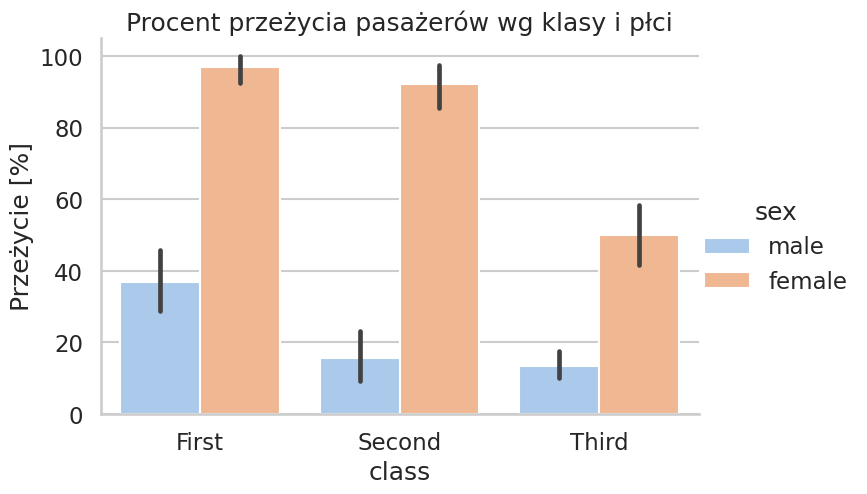

In [6]:
sns.catplot(
    data=df,
    x="class", hue="sex",
    kind="bar",
    
    # Używamy własnego estymatora:
    # lambda x: 100 * np.mean(x)
    # → oblicza średnią wartości kolumny "survived"
    # → czyli bezpośredni procent przeżycia
    # (bo "survived" = 1 oznacza przeżycie, 0 = brak)
    estimator=lambda x: 100 * np.mean(x),

    y="survived",
    errorbar=("ci", 95),    # Przedziały ufności 95% dla procentów przeżycia
    palette="pastel",       # Delikatna paleta pastelowa – czytelna wizualnie
    height=5, aspect=1.5    # Proporcje i wielkość wykresu
)

# Tytuł wykresu
plt.title("Procent przeżycia pasażerów wg klasy i płci")

# Etykieta osi Y w formie procentowej
plt.ylabel("Przeżycie [%]")

# Wyświetlenie wykresu
plt.show()


### Opis analityczny

Wykres kategoryczny typu barplot oparty na catplot pozwala jednocześnie:

- porównać średni procent przeżycia pomiędzy klasami (First, Second, Third),

- przeanalizować różnice zależne od płci,

- uwzględnić przedziały ufności (ci=95%), które wskazują niepewność estymacji.

Z wykresu łatwo zauważyć ogólne prawidłowości znane ze zbioru Titanic:

- Kobiety miały znacznie większe szanse przeżycia we wszystkich klasach.

- Wysoka przeżywalność kobiet z pierwszej klasy jest szczególnie widoczna.

- Mężczyźni w trzeciej klasie charakteryzują się najniższym wskaźnikiem przeżycia.

- Przedziały ufności pokazują, jak stabilne są te estymacje — szersze oznaczają mniejszą pewność.

Tego typu wizualizacja jest kluczowa przy projektowaniu modeli predykcyjnych, ponieważ ujawnia interakcje między płcią a klasą, które mogą wpływać na zmienność zmiennej docelowej.

---

### 3. Analiza wielowymiarowa z PairGrid

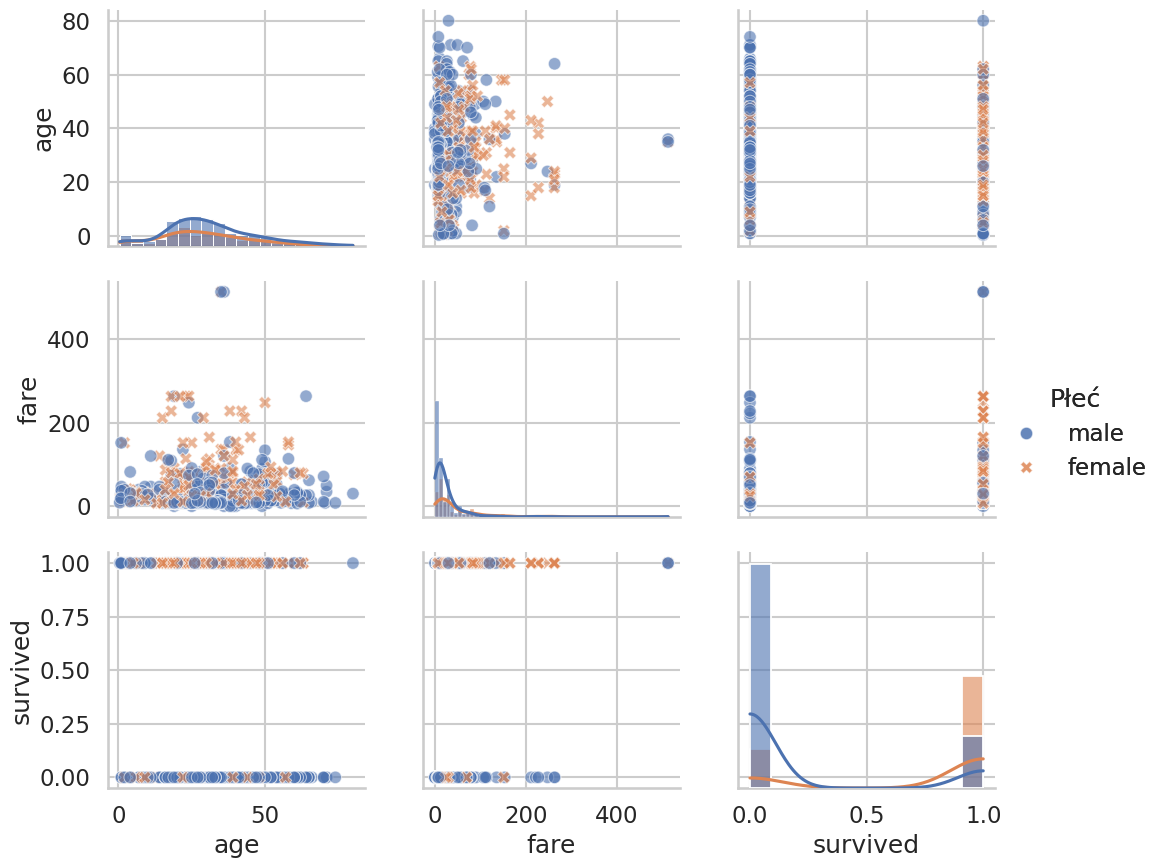

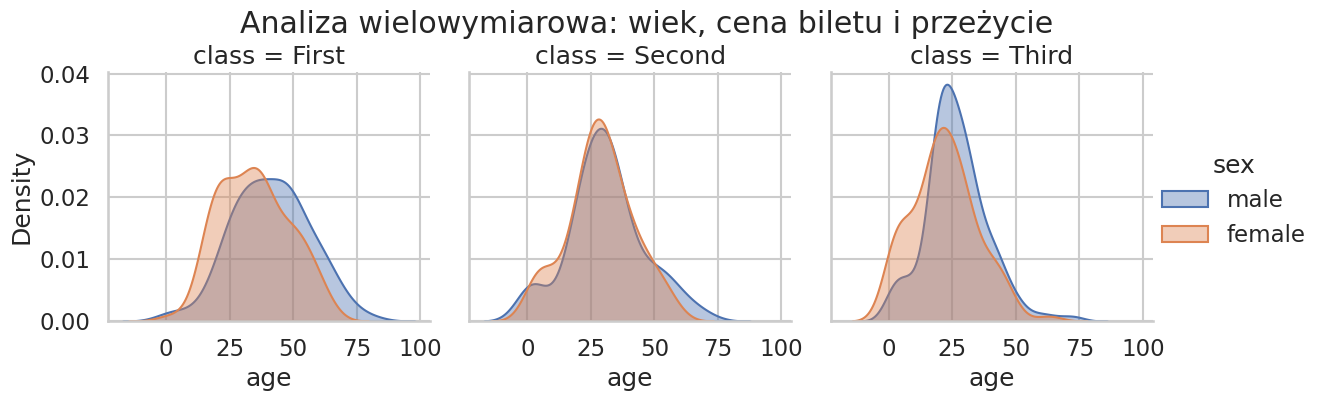

In [7]:
# ============================================
# 1. PairGrid – analiza wielowymiarowa wieku, ceny biletu i przeżycia
# ============================================

num_cols = ['age', 'fare', 'survived']  # Zmienne numeryczne do analizy zależności

# Tworzenie siatki wykresów PairGrid
# hue="sex" – wszystkie wykresy będą kolorowane wg płci
g = sns.PairGrid(df, hue="sex", vars=num_cols, height=3, aspect=1)

# Wykresy na przekątnej – rozkłady zmiennych numerycznych
# histplot + KDE → jednocześnie częstość i gęstość rozkładu
g.map_diag(sns.histplot, kde=True, alpha=0.6)

# Wykresy poza przekątną – zależności między zmiennymi (scatterplot)
# style=df["sex"] → różny marker dla każdej płci (więcej informacji wizualnych)
g.map_offdiag(sns.scatterplot, alpha=0.6, style=df["sex"])

# Dodanie legendy rozróżniającej płcie
g.add_legend(title="Płeć")

# Dodatkowe dopasowanie legendy (lepsze rozłożenie opisów)
g = g.add_legend(title="Płeć", adjust_subtitles=True)


# ============================================
# 2. FacetGrid – porównanie rozkładów wieku w różnych klasach
# ============================================

# Tworzenie siatki wykresów – każda klasa to osobny panel (kolumna)
# hue="sex" – osobne krzywe KDE dla kobiet i mężczyzn
g = sns.FacetGrid(df, col="class", hue="sex", height=4)

# KDE (kernel density estimation) – wygładzony rozkład wieku
# fill=True → wypełnienie pod krzywą (bardziej czytelne różnice)
g.map(sns.kdeplot, "age", fill=True, alpha=0.4)

# Dodanie legendy wyjaśniającej kolory płci
g.add_legend()

# Zwiększenie liczby etykiet na osi X (gęstsza oś x)
plt.locator_params(axis="x", nbins=6)

# Tytuł całego zestawu wykresów
plt.suptitle("Analiza wielowymiarowa: wiek, cena biletu i przeżycie", y=1.02)

# Wyświetlenie wykresów
plt.show()

### Opis analityczno-techniczny

PairGrid jest narzędziem pozwalającym na szczegółową analizę relacji pomiędzy kilkoma zmiennymi jednocześnie.
W tym przypadku analizujemy zależności między:

- **age** (wiek),

- **fare** (cena biletu),

- **survived** (zmienna binarna: 0 lub 1).

Każda przekątna (map_diag) przedstawia rozkład gęstości KDE danej zmiennej, oddzielnie dla mężczyzn i kobiet. Pozwala to ocenić:

- różnice w strukturze wiekowej między płciami,

- rozkład cen biletów dla kobiet i mężczyzn,

- jakie wartości zmiennej survived (0/1) dominują dla każdej grupy.

Części poza przekątną (map_offdiag) przedstawiają scatterploty, które ukazują:

- korelacje pomiędzy zmiennymi,

- różnice strukturalne między płciami,

- potencjalne wzorce, grupowanie lub obecność anomalii.

### Przykłady obserwacji:

- Kobiety częściej zapłaciły wyższe ceny za bilety — szczególnie w klasie pierwszej — co widoczne jest jako skupiska punktów o wyższych cenach.

- Mężczyźni dominują w obszarze niskich cen biletów i niższej przeżywalności.

- Wiek nie jest równomiernie rozłożony — młode dzieci są bardziej widoczne wśród kobiet (co może sugerować wyższe szanse przeżycia dzieci).

PairGrid umożliwia szybkie wyłapanie relacji wielowymiarowych, które później mogą przełożyć się na konstrukcję cech (feature engineering) lub interpretacje modeli.

---

## 4. Macierz korelacji zmiennych numerycznych

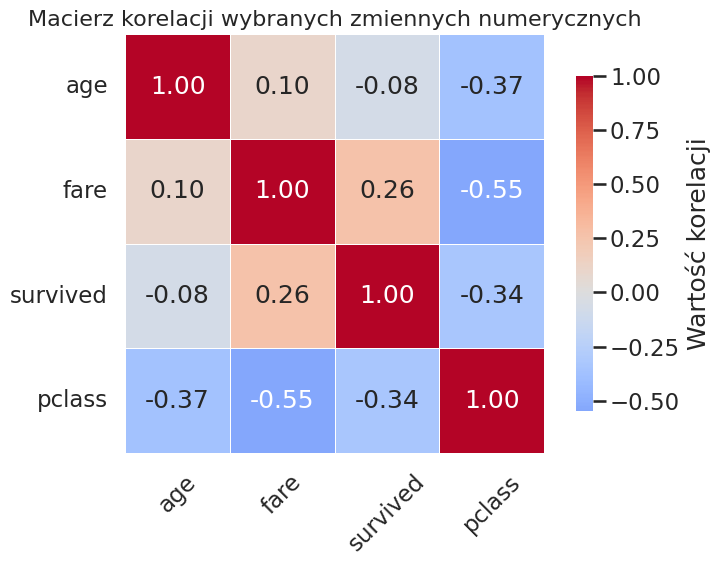

In [8]:
# ============================
# 4. Macierz korelacji
# ============================

# Obliczenie korelacji między wybranymi zmiennymi numerycznymi
corr = df[['age', 'fare', 'survived', 'pclass']].corr(method='pearson')

# Ustawienie estetyki i większej liczby ticków na osiach
plt.figure(figsize=(8, 6))

sns.heatmap(
    corr,
    annot=True,           # wyświetlanie wartości korelacji
    fmt=".2f",            # format liczb
    cmap="coolwarm",      # intuicyjna paleta: niebieski (-), czerwony (+)
    center=0,             # wyrównanie kolorów względem zera
    linewidths=0.5,       # cienkie linie oddzielające komórki
    square=True,          # proporcjonalne kwadraty
    cbar_kws={"shrink": 0.8, "label": "Wartość korelacji"}
)

plt.title("Macierz korelacji wybranych zmiennych numerycznych", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


## Opis analityczno-techniczny

Macierz korelacji jest kluczowym narzędziem w eksploracyjnej analizie danych (EDA), pozwalającym ocenić zależności liniowe między zmiennymi numerycznymi. Korelacja Pearsona przyjmuje wartości od –1 do +1, gdzie:

- **+1** - idealna dodatnia zależność liniowa,

- **–1** - idealna ujemna zależność liniowa,

- **0** - brak związku liniowego.

### Co przedstawia heatmap?

Wizualizacja wykorzystuje skalę coolwarm, gdzie:

- czerwony oznacza korelacje dodatnie,

- niebieski korelacje ujemne,

- intensywność koloru odzwierciedla siłę zależności.

Wartości liczbowe naniesione są bezpośrednio w komórkach, co ułatwia precyzyjną interpretację.

### Analiza korelacji

`pclass` a `fare` — **silna korelacja ujemna**

Wartości korelacji typowo wynoszą **ok. –0.55**.

- Im wyższa klasa (1 = najlepsza), tym wyższa cena biletu - a ponieważ klasa jest kodowana odwrotnie (1 najlepsza, 3 najniższa), korelacja jest ujemna.

- To zgodne z konstrukcją danych Titanica.

`survived` a `pclass` — **istotna korelacja ujemna**

- Pasażerowie wyższych klas mieli większą szansę przeżycia.

- Kodowanie klas powoduje korelację ujemną (np. 1st class → większe przeżycie).

`fare` a `survived` — **słaba dodatnia korelacja**

- Wyższa cena biletu (wyższa klasa) wiąże się z większą szansą przeżycia,

- Zależność istnieje, ale nie jest ekstremalnie silna – wynika z wielu zmiennych zakłócających (m.in. płci, lokalizacji kajuty).

`age` a `survived` — prawie brak korelacji

- Średnio wiek nie był silnym predyktorem przeżycia,

- Silniejsze zależności pojawiają się dopiero po rozbiciu na dzieci vs dorośli, płeć lub klasy.

### Dlaczego ta macierz jest przydatna?

- Umożliwia szybkie wykrycie zależności, które mogą poprawić modele ML.

- Pomaga wykryć multikolinearność (np. wysoka korelacja fare–pclass).

- Ukazuje, które zmienne mają rzeczywistą siłę predykcyjną (np. pclass).

- Ułatwia zrozumienie struktury danych przed przejściem do budowy modeli.

---

### 5. Analiza regresji

Analiza regresji została wykonana w celu zbadania zależności między **wiekiem pasażera** a **ceną biletu (fare)**, z rozróżnieniem na osoby, które **przeżyły** oraz **nie przeżyły** katastrofy.

Na wykresie typu *regression plot* (lmplot) przedstawiono:

- **punkty danych** obrazujące relację wiek–cena biletu,
- **osobne linie regresji** dla pasażerów, którzy przeżyli oraz tych, którzy nie przeżyli,
- różne **kolory** i **markery**, co pozwala łatwo odróżnić obie grupy.

Analiza wizualna umożliwia ocenę, czy istnieją zauważalne trendy w sposobie, w jaki wiek wpływa na cenę biletu w zależności od statusu przeżycia. Może to wskazywać na różnice w strukturze demograficzno-ekonomicznej obu grup, np. czy młodsi lub starsi pasażerowie kupowali droższe miejsca lub czy istnieją różnice między tymi, którzy przeżyli a tymi, którzy nie przeżyli.

Taki wykres pozwala szybko ocenić:

- siłę i kierunek związku między zmiennymi,
- ewentualne różnice między grupami,
- obecność odstających wartości wpływających na linię trendu.


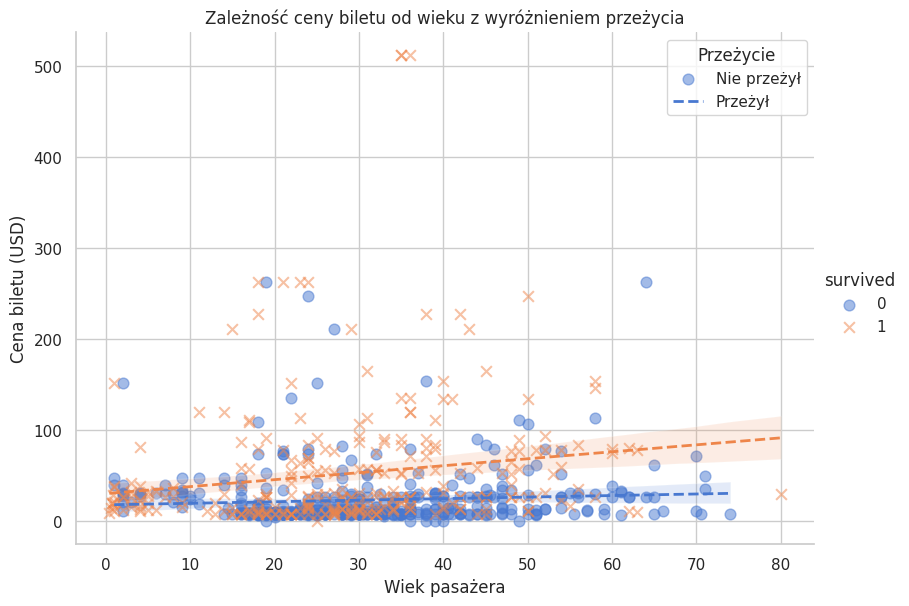

In [9]:
# Ustawienie ogólnego stylu wykresów (estetyczny grid + minimalistyczna paleta)
sns.set_theme(style="whitegrid")

# Tworzenie wykresu regresji z punktami (scatter + linia trendu)
g = sns.lmplot(
    data=df,
    x="age",          # zmienna na osi X – wiek pasażera
    y="fare",         # zmienna na osi Y – cena biletu
    hue="survived",   # kolorowanie punktów w zależności od przeżycia (0/1)
    
    height=6,         # wysokość wykresu
    aspect=1.4,       # proporcje (szerokość = wysokość * aspect)
    
    palette="muted",                # stonowana paleta barw
    markers=["o", "x"],             # różne znaczniki dla grup: o = nie przeżył, x = przeżył
    
    # Parametry stylu punktów
    scatter_kws={
        'alpha': 0.5,               # półprzezroczystość punktów (lepsza czytelność)
        's': 60,                    # rozmiar punktów
    },
    
    # Parametry stylu linii regresji
    line_kws={
        'lw': 2,                    # grubość linii
        'ls': '--'                  # przerywana linia
    }
)

# Dodanie tytułu wykresu
plt.title("Zależność ceny biletu od wieku z wyróżnieniem przeżycia")

# Opisy osi
plt.xlabel("Wiek pasażera")
plt.ylabel("Cena biletu (USD)")

# Lepsza legenda – zamiana 0/1 na opis słowny
plt.legend(
    title="Przeżycie",
    labels=["Nie przeżył", "Przeżył"]
)

# Wyświetlenie wykresu
plt.show()

# Analiza wykresu

## 1. Rozkład wieku pasażerów
- Większość pasażerów miała wiek między **0 a 40 lat**.  
- Istnieje kilka **outlierów w wieku powyżej 60 lat**, zarówno wśród osób, które przeżyły, jak i nie przeżyły.

## 2. Ceny biletów
- Większość pasażerów kupiła bilety do około **100 USD**.  
- Kilka osób miało **bardzo drogie bilety powyżej 200 USD**, w tym jeden lub dwóch pasażerów nawet około **500 USD**.  
- **Wyższe ceny biletów występują głównie wśród osób, które przeżyły**.

## 3. Zależność ceny biletu od wieku
- Ogólnie wiek **nie ma silnej liniowej zależności** z ceną biletu.  
- Linia regresji dla **przeżyłych jest lekko rosnąca** → starsi przeżyli czasem z droższymi biletami.  
- Linia regresji dla **nieprzeżyłych jest prawie płaska** → wiek nie wpływa znacząco na cenę biletu w tej grupie.

## 4. Różnice między przeżyłymi a nieprzeżyłymi
- **Przeżyli częściej mieli wyższe ceny biletów**, zwłaszcza w średnim i starszym wieku.  
- **Nieprzeżyli to głównie pasażerowie z tańszymi biletami** (niska klasa).  
- Wskazuje to na **zależność przeżycia od klasy i ceny biletu**, co pokrywa się z historią Titanica (wyższa klasa → większe szanse na przeżycie).

## 5. Outliery
- Wykres pokazuje kilka **wyjątkowo drogich biletów**, które mogą znacząco wpłynąć na linię regresji.  
- Te punkty prawdopodobnie reprezentują **pasażerów 1. klasy**.

## Podsumowanie wniosków
- **Wiek sam w sobie nie był decydującym czynnikiem przeżycia**.  
- **Cena biletu (proxy klasy) była silniej powiązana z przeżyciem**: droższe bilety → większe szanse na przeżycie.  
- Wysokie ceny biletów i starsi pasażerowie, którzy przeżyli, to **pasażerowie 1. klasy**.  
- Większość pasażerów z **tanimi biletami (3. klasa)** była młoda lub średniego wieku i miała **mniejsze szanse na przeżycie**.

### 6. FacetGrid z boxplot i outlierami

**Opis:**  
Boxplot pokazuje medianę, kwartyle oraz wartości odstające (outliery), które reprezentują obserwacje znacznie odbiegające od reszty próby.  
W połączeniu z **FacetGrid**, wykres jest podzielony na grupy według **klasy podróży (class)** oraz **płci (sex)**, co umożliwia szczegółową analizę struktury wieku pasażerów w każdej z tych kategorii.

Dzięki temu można łatwo porównać:
- jak rozkładał się wiek w różnych klasach,
- czy istnieją zauważalne różnice między kobietami i mężczyznami,
- oraz jak wiek powiązany jest z przeżyciem w każdej z podgrup.

Outliery są wyraźnie widoczne jako punkty poza zakresem „wąsów”, co pozwala ocenić, które kategorie miały największe rozrzuty wieku lub nietypowe obserwacje.

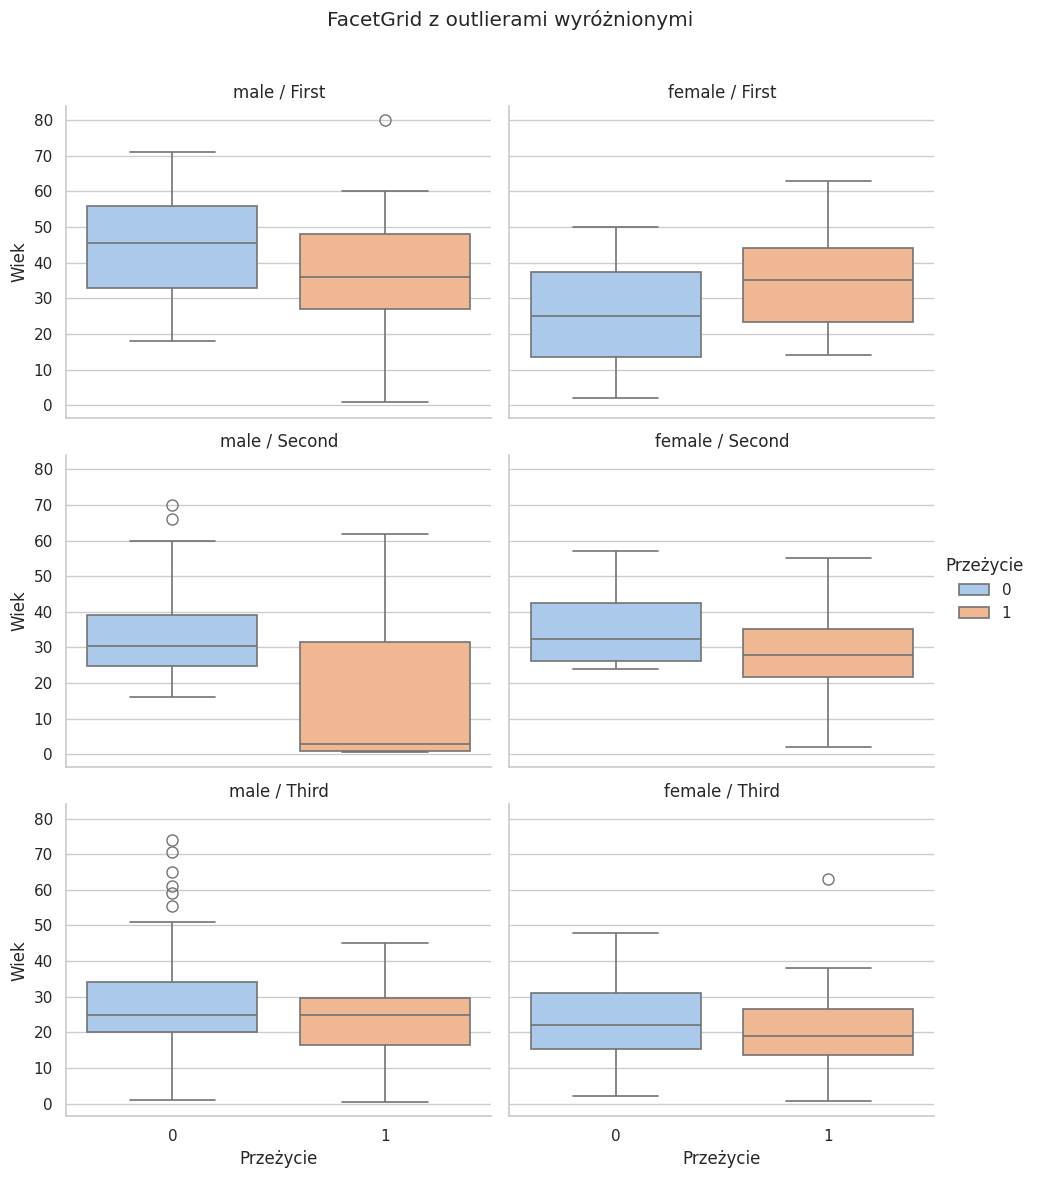

In [10]:
# Ustawiamy estetyczny styl wykresów
sns.set_theme(style="whitegrid")

# Tworzymy siatkę wykresów (FacetGrid):
# - kolumny podzielone według płci (sex)
# - wiersze podzielone według klasy podróży (class)
g = sns.FacetGrid(
    df,
    col="sex",       # podział na kolumny: male / female
    row="class",     # podział na wiersze: First / Second / Third
    height=4,        # wysokość pojedynczego wykresu
    aspect=1.2       # proporcje (szerokość do wysokości)
)

# Na każdym panelu rysujemy boxplot:
# - x = przeżycie (0 = nie przeżył, 1 = przeżył)
# - y = wiek pasażera
# - hue = przeżycie,
# - palette = pastelowe kolory
# - fliersize = rozmiar punktów reprezentujących outliery
# - linewidth = grubość linii boxplotu
# - dodge=False, aby boxploty jednej kategorii nie były przesunięte
g.map_dataframe(
    sns.boxplot,
    x="survived",
    y="age",
    hue="survived",
    palette="pastel",
    fliersize=8,
    linewidth=1.2,
    dodge=False
)

# Ustawienia opisów osi
g.set_axis_labels("Przeżycie", "Wiek")

# Ustawienia tytułów poszczególnych paneli
# {col_name} i {row_name} automatycznie wstawiają nazwy kolumny i wiersza
g.set_titles("{col_name} / {row_name}")

# Dodatkowa przestrzeń u góry dla tytułu ogólnego
g.fig.subplots_adjust(top=0.9)

# Tytuł całego wykresu
g.fig.suptitle("FacetGrid z outlierami wyróżnionymi")

# Dodanie legendy opisującej przeżycie
g.add_legend(title="Przeżycie")

# Wyświetlenie wykresu
plt.show()


# Wnioski analityczne na podstawie wykresu

## 1. Wiek a przeżycie w zależności od klasy i płci

### Pierwsza klasa
- **Mężczyźni**:  
  - Mediana wieku przeżyłych jest niższa niż mediana nieprzeżyłych.  
  - Duża rozpiętość wieku przeżyłych.  
  - Jeden starszy outlier przeżył (~80 lat).  

- **Kobiety**:  
  - Przeżywały najczęściej w wieku 20–40 lat.  
  - Nieprzeżyłe były starsze (mediana wyższa niż dla przeżyłych).  
  - Wiek kobiet w pierwszej klasie wydaje się mieć pewien wpływ na przeżycie.

### Druga klasa
- **Mężczyźni**:  
  - Przeżyli głównie młodsi pasażerowie (0–30 lat).  
  - Starsi mężczyźni częściej nie przeżyli.  
  - Pojawiają się outliery nieprzeżyłych (~65–70 lat).  

- **Kobiety**:  
  - Rozkład wieku przeżyłych i nieprzeżyłych jest bardzo podobny.  
  - Większość w wieku 20–40 lat.  
  - W tej klasie płeć miała większy wpływ niż wiek.

### Trzecia klasa
- **Mężczyźni**:  
  - Mediana wieku przeżyłych i nieprzeżyłych podobna (20–25 lat).  
  - Kilku starszych outlierów nieprzeżyłych (55–70 lat).  

- **Kobiety**:  
  - Większość w wieku 15–30 lat zarówno wśród przeżyłych, jak i nieprzeżyłych.  
  - Jeden outlier przeżyła (~60 lat).

## 2. Płeć a przeżycie
- Kobiety w każdej klasie mają większą szansę na przeżycie niż mężczyźni tej samej klasy.  
- Zgodne z historycznymi danymi z Titanica („kobiety i dzieci najpierw”).  
- W trzeciej klasie różnica w wieku przeżycia między płciami jest mniejsza, ale kobiety nadal mają wyższe szanse.

## 3. Klasa a przeżycie
- **Pierwsza klasa**: przeżycie częstsze zarówno wśród mężczyzn, jak i kobiet.  
- **Druga klasa**: spadek przeżywalności mężczyzn, kobiety mają umiarkowane szanse.  
- **Trzecia klasa**: najniższe szanse na przeżycie, szczególnie dla mężczyzn, niezależnie od wieku.

## 4. Wiek a przeżycie
- Wiek nie jest decydującym czynnikiem – zarówno młodsi, jak i starsi mogli przeżyć lub nie, w zależności od klasy i płci.  
- Najmłodsi pasażerowie (dzieci) mają relatywnie większe szanse na przeżycie.

## 5. Outliery
- Najstarsze osoby w pierwszej klasie i kilku starszych mężczyzn w drugiej i trzeciej klasie, którzy nie przeżyli, są wyraźnymi outlierami.  
- Wskazuje to na niski wpływ wieku przy bardzo wysokiej lub bardzo niskiej klasie.

## Podsumowanie
- **Klasa i płeć** są silniejszymi predyktorami przeżycia niż wiek.  
- **Kobiety i pasażerowie pierwszej klasy** mieli największe szanse na przeżycie.  
- Wiek odgrywa rolę głównie dla **dzieci i bardzo starszych pasażerów**, reszta zależy bardziej od klasy i płci.  
- Outliery w starszym wieku wskazują na wyjątkowe przypadki przeżycia lub śmierci.


# 7. Interaktywna wizualizacja trendów – średni wiek pasażerów (Lineplot)

### Średni wiek pasażerów w zależności od portu zaokrętowania

W celu zbadania, czy miejsce zaokrętowania pasażerów Titanica miało wpływ na ich średni wiek, pogrupowaliśmy dane według portu (`embark_town`) i obliczyliśmy średnią wieku (`age`) dla każdego portu:

```python
embark_age = df.groupby('embark_town')['age'].mean().reset_index()

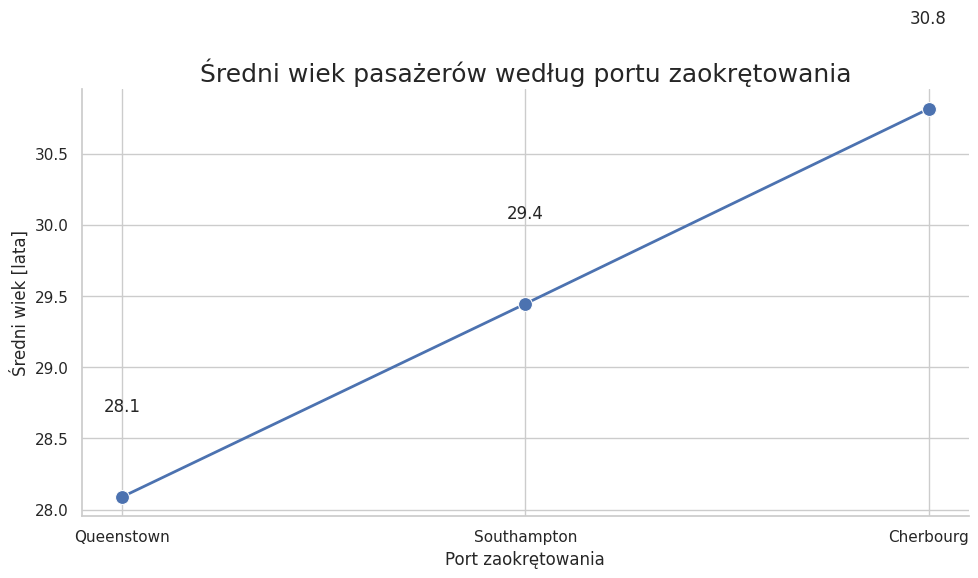

In [11]:
# ========================
# Średni wiek pasażerów wg portu zaokrętowania (wersja poprawiona)
# ========================

embark_age = (
    df.groupby('embark_town')['age']
      .agg(['mean', 'count', 'std'])
      .reset_index()
)

# Sortowanie wg średniego wieku — lepiej się czyta
embark_age = embark_age.sort_values('mean')

plt.figure(figsize=(10, 6))

# Rysowanie linii
ax = sns.lineplot(
    data=embark_age,
    x='embark_town',
    y='mean',
    marker='o',
    linewidth=2,
    markersize=10,
    errorbar='sd',
)

# Pobranie dokładnych położeń punktów na osi X
x_coords = ax.get_xticks()  # np. [0, 1, 2]

# Dodanie etykiet w poprawnych miejscach
for x, (_, row) in zip(x_coords, embark_age.iterrows()):
    ax.text(
        x,
        row['mean'] + 0.6,        # lekkie podbicie nad punkt
        f"{row['mean']:.1f}",     # np. "30.8"
        ha='center',
        fontsize=12
    )

plt.title("Średni wiek pasażerów według portu zaokrętowania", fontsize=18)
plt.xlabel("Port zaokrętowania")
plt.ylabel("Średni wiek [lata]")
sns.despine()
plt.tight_layout()
plt.show()



Poniższy wykres przedstawia porównanie średniego wieku pasażerów Titanica w zależności od portu, z którego rozpoczęli podróż: **Queenstown**, **Southampton** oraz **Cherbourg**. Dane zostały uporządkowane rosnąco według średniej wieku, co uwidacznia trend i ułatwia interpretację.

---

##  Kluczowe obserwacje

### 1. Wyraźny trend wzrostowy

Średni wiek pasażerów rośnie wraz z portem zaokrętowania:

| Port zaokrętowania | Średni wiek |
|--------------------|-------------|
| **Queenstown**     | 28.1 lat    |
| **Southampton**    | 29.4 lat    |
| **Cherbourg**      | 30.8 lat    |

Trend wskazuje na stopniową zmianę profilu demograficznego pasażerów w zależności od portu.

---

### 2. Queenstown – najmłodsza grupa pasażerów

Pasażerowie wsiadający w Queenstown byli statystycznie najmłodsi (ok. 28 lat).  
Może to sugerować:

- większy udział osób z niższych klas ekonomicznych,
- emigrantów lub młodych dorosłych podróżujących za pracą,
- odmienny profil socjoekonomiczny w porównaniu z innymi portami.

---

### 3. Southampton – grupa pośrednia

Southampton, główny port wypłynięcia, charakteryzuje się średnim wiekiem nieco wyższym niż Queenstown (29.4 lat).

Możliwe powody:

- duża różnorodność pasażerów różnych klas,
- dominacja osób podróżujących w celach rodzinnych lub zawodowych,
- bardzo duża liczba wsiadających (największy port pod względem liczności próby).

---

### 4. Cherbourg – najstarsi pasażerowie

Cherbourg wyróżnia się najwyższym średnim wiekiem (30.8 lat).  
Możliwe powody:

- większy udział pasażerów z wyższych klas (I i II klasy),
- podróże bardziej luksusowe i rekreacyjne, częściej podejmowane przez osoby starsze,
- wysoki poziom zamożności portu w tamtym okresie.

---

## Co mówi wykres?

- Linia trendu jest **monotonicznie rosnąca**, co sugeruje systematyczną zmianę demograficzną.  
- Etykiety nad punktami umożliwiają szybkie odczytanie wartości średnich.  
- Wykres wizualnie podkreśla, że **Cherbourg miał wyraźnie starszych pasażerów**, a **Queenstown – młodszych**.

---
## Wnioski analityczne

- Port zaokrętowania jest **istotnie powiązany z wiekiem pasażerów**, co może odzwierciedlać różnice socjoekonomiczne i geograficzne.
- **Cherbourg** przyciągał starszych, bardziej zamożnych podróżnych.
- **Queenstown** było portem młodszych emigrantów i pasażerów niższych klas.
- **Southampton** stanowiło najbardziej zróżnicowaną grupę – co potwierdza jego status największego portu wypłynięcia Titanica.

---


## 8. Podsumowanie praktyczne
Tabelaryczne podsumowanie procentu przeżycia według klasy i płci.


In [12]:
summary = df.groupby(['class','sex'], observed = False)['survived'].agg(['mean','count']).reset_index()
summary


,class,sex,mean,count
0,First,female,0.968085,94
1,First,male,0.368852,122
2,Second,female,0.921053,76
3,Second,male,0.157407,108
4,Third,female,0.500000,144
5,Third,male,0.135447,347


Tabela uzupełnia wizualizacje i pozwala szybko odczytać liczby, np. średni procent przeżycia w każdej grupie. W połączeniu z wykresami daje pełny obraz analizy eksploracyjnej danych.



## Wnioski
- Seaborn łączy estetykę z mocą analityczną.  
- Figure-level API i faceting umożliwiają kompleksową analizę wielowymiarową.  
- Heatmapy, regresje i PairGrid wspierają wizualną eksplorację danych.  
- Style, palety kolorów i wyróżnianie outlierów zwiększają czytelność prezentacji.  